In [2]:
'''
mean = sqrt(a_hat_t) * x_0
variance = sqrt(1 - a_hat_t) * identity_matrix

https://lilianweng.github.io/posts/2021-07-11-diffusion-models/
'''

'\nmean = sqrt(a_hat_t) * x_0\nvariance = sqrt(1 - a_hat_t) * identity_matrix\n\nhttps://lilianweng.github.io/posts/2021-07-11-diffusion-models/\n'

In [29]:
import torch
import numpy as np
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
# define sample input image
x_0 = torch.rand(2, 3, 32, 32)

In [7]:
# betas := amounts of noise that are being applied at every timestep of the diffusion process 
# aplhas = 1 - betas := amounts of original image's informations that is being preserved after a diffusion process

# betas = torch.tensor([0.05, 0.1, 0.15, 0.2, 0.25]) # add 0.5 for every step
betas = torch.arange(0.05, 0.3, 0.05)


In [8]:
t = torch.tensor([1,3])

In [9]:
alphas = 1 - betas
alphas

tensor([0.9500, 0.9000, 0.8500, 0.8000, 0.7500])

$\bar{\alpha_t} = \prod_{i=1}^{t} a_{i}$

In [10]:
alpha_hat = torch.cumprod(alphas, dim=0) 
alpha_hat

tensor([0.9500, 0.8550, 0.7268, 0.5814, 0.4360])

In [11]:
# we wont to get residual information from original image at timestep t, here we want to have at t = 1 and t = 3
result = alpha_hat.gather(0, t).reshape(-1, 1, 1, 1)
result.shape

torch.Size([2, 1, 1, 1])

In [12]:
identity = torch.rand_like(x_0) # noise with 0 ~ 1 range

In [13]:
mean = torch.sqrt(result) * x_0
variance = torch.sqrt(1 - result) * identity


In [14]:
mean.shape, variance.shape

(torch.Size([2, 3, 32, 32]), torch.Size([2, 3, 32, 32]))

In [15]:
x_t = mean + variance
x_t.shape

torch.Size([2, 3, 32, 32])

In [54]:
def forward_diffusion(x_0, t, T):
    betas = betas = torch.linspace(0.0, 1.0, T)
    noise = torch.rand_like(x_0)
    alphas = 1 - betas
    alpha_hat = torch.cumprod(alphas, dim=0)
    result = alpha_hat.gather(-1, t).reshape(-1, 1, 1, 1)
    mean = torch.sqrt(result) * x_0
    variance = torch.sqrt(1 - result) * noise
    return mean + variance, noise
    

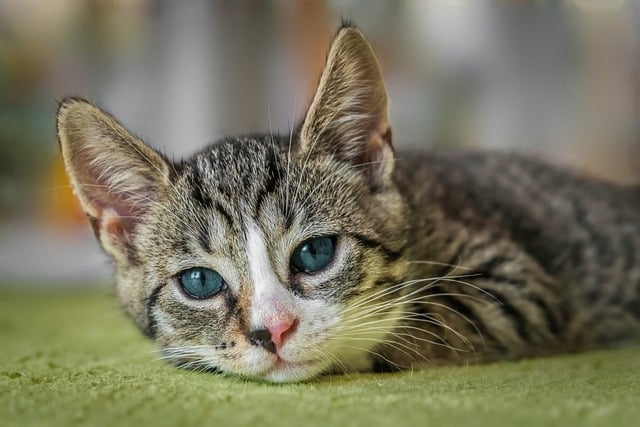

In [41]:
image = Image.open('cat.jpeg')
image

In [45]:
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(), # convert 0 ~ 1
    transforms.Lambda(lambda t: (t*2) - 1) # convert to -1 ~ 1
])

reverse_transform = transforms.Compose([
    transforms.Lambda(lambda t: (1 + t) / 2), # convert from -1 ~ 1 to 0 ~ 1
    transforms.Lambda(lambda t: t.permute(1,2,0)), # make it the image without batch so we have h, w, channel
    transforms.Lambda(lambda t: t * 255.),
    transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
    transforms.ToPILImage()
])

In [46]:
image_tensor = transform(image)
image_tensor.shape

torch.Size([3, 32, 32])

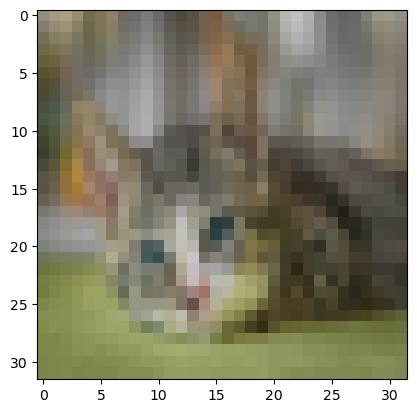

In [48]:
image_0 = reverse_transform(image_tensor)
plt.imshow(image_0)

In [63]:
t = torch.arange(5)
batch_images = torch.stack([image_tensor]*len(t))
noisy_images, _ = forward_diffusion(batch_images, t, T=len(t))

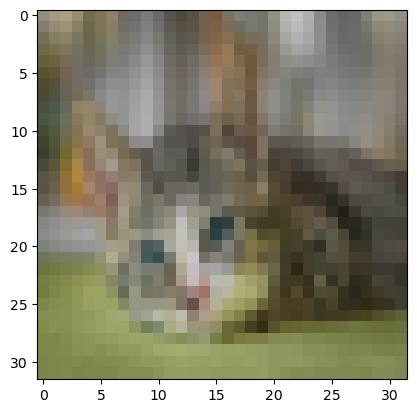

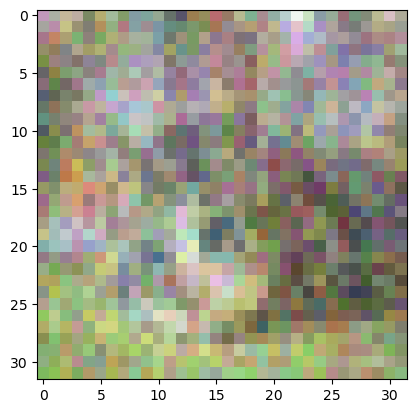

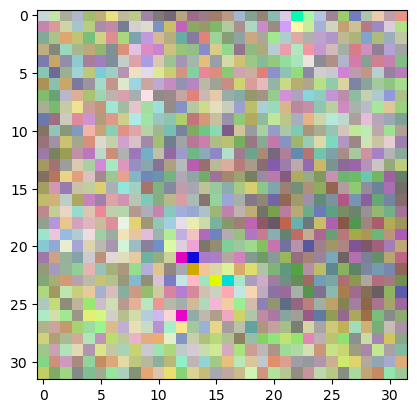

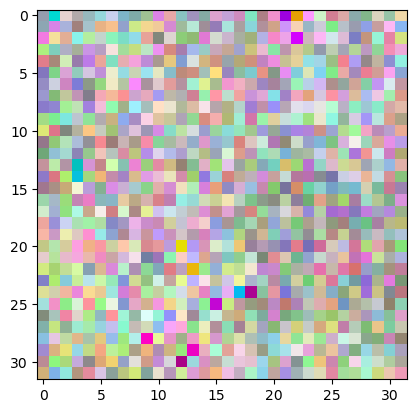

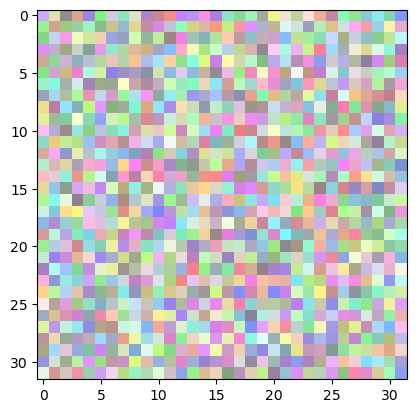

In [65]:
for image in noisy_images:
    plt.imshow(reverse_transform(image))
    plt.show()